<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Advanced_ML_AI/Clase_03_Intro_Redes_Neuronales/03B_Introducci%C3%B3n_reconocimiento_de_imagen_con_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 INTRODUCCIÓN
En este notebook nos introduciremos al reconocimiento de imagen con redes neuronales utilizando como ejemplo un ejercicio de diferenciación de género.



Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1vFXqP9QBoipKkGjajyqZEDelGllNueR51kBmXCGWzck/edit?usp=sharing)
*   [Enlace a este notebook](https://colab.research.google.com/github/JotaBlanco/ElClubDeLaBolsa/blob/Javi/Advanced_ML_AI/Clase_03_Intro_Redes_Neuronales/03B_Introducci%C3%B3n_reconocimiento_de_imagen_con_Redes_Neuronales.ipynb)

## 0101 Import
Puedes importar aquí las librerías que creas que vas a necesitar.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 0102 Carga el dataset de LFW
Por primera vex (conmigo al menos), no vamos a importar datos en formato tabular, sino imagenes!

LFW (Labeled Faces in the Wild) es un dataset famoso que contiene caras de personas conocidas. Sklearn incorpora en su librería [una función](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html) para importar imagenes de este dataset, así que podemos descargarlos desde sklearn.

In [ ]:
# Nos importamos la función que ingesta las imagenes 
# Más info sobre ella aquí 
from sklearn.datasets import fetch_lfw_people

In [ ]:
# Importamos las imágenes: esto puede tardar 2-3 minutos 
lfw_people = fetch_lfw_people(min_faces_per_person = 5, 
                              color=False, 
                              resize=1,
                              slice_=(slice(48, 202), slice(48, 202)))

# 02 EDA
Vamos a hacer un pequeño análisis exploratorio de los datos que nos hemos importado.

## 0201 Qué es lfw_people?
Qué esto que hemos creado/importado?

In [ ]:
type(lfw_people)

sklearn.utils.Bunch

In [ ]:
lfw_people.data

array([[ 26.      ,  30.666666,  33.666668, ...,  36.333332,  28.      ,
         21.666666],
       [ 71.666664,  61.666668,  53.333332, ..., 105.666664, 105.333336,
        102.333336],
       [ 24.333334,  25.333334,  25.333334, ...,  29.666666,  29.666666,
         29.      ],
       ...,
       [ 39.333332,  37.333332,  36.333332, ...,  14.666667,  15.666667,
         15.666667],
       [141.33333 , 141.33333 , 141.33333 , ...,  58.      ,  30.666666,
         24.666666],
       [ 50.666668,  92.333336, 135.33333 , ...,  23.      ,  23.      ,
         23.      ]], dtype=float32)

In [ ]:
lfw_people.images

array([[[ 26.      ,  30.666666,  33.666668, ...,  15.666667,
          17.333334,  17.333334],
        [ 24.      ,  29.666666,  32.666668, ...,  13.333333,
          15.333333,  16.333334],
        [ 21.666666,  26.      ,  29.666666, ...,   9.333333,
          13.333333,  15.333333],
        ...,
        [ 84.333336,  81.333336,  78.333336, ...,  32.      ,
          22.666666,  17.666666],
        [ 85.333336,  79.333336,  73.      , ...,  33.      ,
          27.      ,  20.666666],
        [ 86.333336,  80.333336,  73.      , ...,  36.333332,
          28.      ,  21.666666]],

       [[ 71.666664,  61.666668,  53.333332, ..., 118.      ,
         119.333336, 116.333336],
        [ 74.666664,  67.666664,  59.666668, ..., 118.      ,
         120.      , 118.333336],
        [ 80.666664,  76.333336,  72.333336, ..., 122.      ,
         122.      , 122.      ],
        ...,
        [ 37.666668,  38.      ,  53.      , ..., 108.333336,
         106.333336, 107.666664],
        [ 79

In [ ]:
lfw_people.target

array([ 54,   0, 134, ...,  98, 136,  29])

In [ ]:
lfw_people.target_names

array(['Abdullah Gul', 'Adrien Brody', 'Ahmed Chalabi', 'Ai Sugiyama',
       'Al Gore', 'Al Sharpton', 'Alan Greenspan', 'Alastair Campbell',
       'Albert Costa', 'Alejandro Toledo', 'Ali Naimi', 'Allyson Felix',
       'Alvaro Uribe', 'Amelia Vega', 'Amelie Mauresmo', 'Ana Guevara',
       'Ana Palacio', 'Andre Agassi', 'Andy Roddick', 'Angela Bassett',
       'Angela Merkel', 'Angelina Jolie', 'Ann Veneman',
       'Anna Kournikova', 'Antonio Banderas', 'Antonio Palocci',
       'Ari Fleischer', 'Ariel Sharon', 'Arminio Fraga',
       'Arnold Schwarzenegger', 'Arnoldo Aleman', 'Ashanti',
       'Atal Bihari Vajpayee', 'Ben Affleck', 'Benazir Bhutto',
       'Benjamin Netanyahu', 'Bernard Law', 'Bertie Ahern',
       'Bill Clinton', 'Bill Frist', 'Bill Gates', 'Bill Graham',
       'Bill McBride', 'Bill Simon', 'Billy Crystal',
       'Binyamin Ben-Eliezer', 'Bob Graham', 'Bob Hope', 'Bob Stoops',
       'Boris Becker', 'Brad Johnson', 'Britney Spears', 'Bulent Ecevit',
       'Cal

In [ ]:
len(lfw_people.images), len(lfw_people.target), len(lfw_people.target_names)

(5985, 5985, 423)

## 0202 Visualizar imágenes

George Robertson


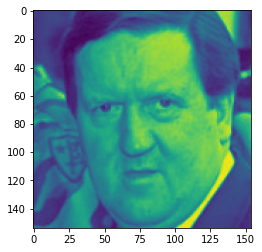

In [ ]:
# Coge un número al azar: i
i = np.random.randint(len(lfw_people.images))

# Ahora visualizamos la imagen i
plt.imshow(lfw_people.images[i]/255)
plt.grid(False)
print(lfw_people.target_names[lfw_people.target[i]])

# 03 Género
Las imagenes no tienen el género, cómo podemos averiguarlo para enseñarselo luego a la red neuronal?

## 0301 API gender-api
Las apis nos permiten establecer diálogos entre máquinas. https://v2.namsor.com/NamSorAPIv2/ te devuelve el género de un nombre (nosotros le pasaremos un nombre, ellos nos devuelven su género en base a su base de datos).



1.   Vete a https://v2.namsor.com/NamSorAPIv2/
2.   Regístrate (con un mail y contraseña)
3.   Vé a tu email y valídalo
4.   Vete a https://v2.namsor.com/NamSorAPIv2/ y copia tu clave personal



##0302 Wrapper namsor-client
Utilizaremos una librería que facilita las cosas:

In [ ]:
# Instalamos namsor-client para hacer requests más sencillas
! pip install namsor-client

In [ ]:
# Tu clave personal
clave = "880c0215ff6424cc59c4199c29a845e6"

In [ ]:
# Importamos la función cliente de la libería
from namsorclient import NamsorClient

# Create an instance of NamsorClient and pass in your API key as an argument.
client = NamsorClient(clave)

# Probamos un nombre y apellidos
response = client.gender("Javi", last_name='Blanco')
response.likely_gender

'male'

In [ ]:
# Probamos otros
response = client.gender("Pepa", last_name='Blanco')
response.likely_gender

'female'

## 0303 Función nombre
Resumimos el código en una función:

In [ ]:
def genero_a_partir_de_nombre(nombre, apellido):
  response = client.gender(nombre, last_name=apellido)
  return response.likely_gender

In [ ]:
genero_a_partir_de_nombre('Javi','Blanco')

'male'

In [ ]:
genero_a_partir_de_nombre('Maria', 'Blanco')

'female'

## 0304 Calcular género de los nombre
Vamos a utilizar la función anterior para crear un vector que nos diaga si cada imagen es hombre/mujer.

In [ ]:
# Buscamos nombre de pila
dic_genero = {}

for i, nombre in enumerate(lfw_people.target_names):
  nombre_pila = nombre.split(" ")[0]
  apellido = nombre.split(" ")[-1]
  genero = genero_a_partir_de_nombre(nombre_pila, apellido)
  print(i, nombre_pila, apellido, genero)
  dic_genero[nombre] = genero

0 Abdullah Gul male
1 Adrien Brody male
2 Ahmed Chalabi male
3 Ai Sugiyama female
4 Al Gore male
5 Al Sharpton male
6 Alan Greenspan male
7 Alastair Campbell male
8 Albert Costa male
9 Alejandro Toledo male
10 Ali Naimi male
11 Allyson Felix female
12 Alvaro Uribe male
13 Amelia Vega female
14 Amelie Mauresmo female
15 Ana Guevara female
16 Ana Palacio female
17 Andre Agassi male
18 Andy Roddick male
19 Angela Bassett female
20 Angela Merkel female
21 Angelina Jolie female
22 Ann Veneman female
23 Anna Kournikova female
24 Antonio Banderas male
25 Antonio Palocci male
26 Ari Fleischer male
27 Ariel Sharon male
28 Arminio Fraga male
29 Arnold Schwarzenegger male
30 Arnoldo Aleman male
31 Ashanti Ashanti female
32 Atal Vajpayee male
33 Ben Affleck male
34 Benazir Bhutto female
35 Benjamin Netanyahu male
36 Bernard Law male
37 Bertie Ahern female
38 Bill Clinton male
39 Bill Frist male
40 Bill Gates male
41 Bill Graham male
42 Bill McBride male
43 Bill Simon male
44 Billy Crystal male
45 

## 0305 X e y provisionales
Calculamos la matriz X y el vector y

In [ ]:
# Nuestra matriz X contiene los datos de las imágenes
X = lfw_people.images

# Dividimos entre 255 para normalizar
X = X/255
X.shape

(5985, 154, 154)

In [ ]:
X[0]

array([[0.10196079, 0.12026144, 0.13202615, ..., 0.06143791, 0.06797386,
        0.06797386],
       [0.09411765, 0.11633987, 0.12810458, ..., 0.05228758, 0.06013072,
        0.06405229],
       [0.08496732, 0.10196079, 0.11633987, ..., 0.03660131, 0.05228758,
        0.06013072],
       ...,
       [0.33071896, 0.31895426, 0.30718955, ..., 0.1254902 , 0.08888888,
        0.06928104],
       [0.33464053, 0.31111112, 0.28627452, ..., 0.12941177, 0.10588235,
        0.08104575],
       [0.3385621 , 0.3150327 , 0.28627452, ..., 0.14248365, 0.10980392,
        0.08496732]], dtype=float32)

In [ ]:
lista_generos = []
for i in range(len(X)):
  nombre_completo = lfw_people.target_names[lfw_people.target[i]]
  lista_generos.append(dic_genero[nombre_completo])

lista_generos[:5]

['male', 'male', 'male', 'male', 'male']

In [ ]:
y = (np.array(lista_generos) == 'male').astype(int)
y

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y.mean(), len(y)

(0.8030075187969925, 5985)

## 0306 Matriz a vector
Convertimos la matriz de la imagen en un vector

In [ ]:
X_flat = np.zeros((len(X), 154*154))
display(X_flat.shape)

for i in range(len(X)):
  X_flat[i,:] = np.ravel(X[i])

X_flat[:5]

(5985, 23716)

array([[0.10196079, 0.12026144, 0.13202615, ..., 0.14248365, 0.10980392,
        0.08496732],
       [0.28104573, 0.24183007, 0.20915033, ..., 0.41437906, 0.4130719 ,
        0.4013072 ],
       [0.09542484, 0.09934641, 0.09934641, ..., 0.11633987, 0.11633987,
        0.11372549],
       [0.57385617, 0.5581699 , 0.55032676, ..., 0.58039218, 0.58039218,
        0.58039218],
       [0.19346404, 0.18954247, 0.18954247, ..., 0.05620915, 0.05228758,
        0.05228758]])

In [ ]:
# Lo pasamos a un df para visualizarlo más fácil
df = pd.DataFrame(X_flat)
display(df.shape)

# Ponemos nombre a las columnas...
df.columns = ['Pixel_'+str(i) for i in range(df.shape[1])]

# Y a las filas
df.index = ['Imagen_'+str(i) for i in range(df.shape[0])]

# Añadimos el target
df['Target'] = y

# Visualizamos
df.head()

(5985, 23716)

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,Pixel_10,Pixel_11,Pixel_12,Pixel_13,Pixel_14,Pixel_15,Pixel_16,Pixel_17,Pixel_18,Pixel_19,Pixel_20,Pixel_21,Pixel_22,Pixel_23,Pixel_24,Pixel_25,Pixel_26,Pixel_27,Pixel_28,Pixel_29,Pixel_30,Pixel_31,Pixel_32,Pixel_33,Pixel_34,Pixel_35,Pixel_36,Pixel_37,Pixel_38,Pixel_39,...,Pixel_23677,Pixel_23678,Pixel_23679,Pixel_23680,Pixel_23681,Pixel_23682,Pixel_23683,Pixel_23684,Pixel_23685,Pixel_23686,Pixel_23687,Pixel_23688,Pixel_23689,Pixel_23690,Pixel_23691,Pixel_23692,Pixel_23693,Pixel_23694,Pixel_23695,Pixel_23696,Pixel_23697,Pixel_23698,Pixel_23699,Pixel_23700,Pixel_23701,Pixel_23702,Pixel_23703,Pixel_23704,Pixel_23705,Pixel_23706,Pixel_23707,Pixel_23708,Pixel_23709,Pixel_23710,Pixel_23711,Pixel_23712,Pixel_23713,Pixel_23714,Pixel_23715,Target
Imagen_0,0.101961,0.120261,0.132026,0.132026,0.146405,0.175163,0.216993,0.245752,0.295425,0.307190,0.295425,0.283660,0.299346,0.307190,0.305882,0.309804,0.300654,0.296732,0.304575,0.287582,0.281046,0.240523,0.216993,0.194771,0.198693,0.190850,0.194771,0.210458,0.230065,0.233987,0.244444,0.256209,0.267974,0.264052,0.252288,0.232680,0.209150,0.193464,0.189542,0.197386,...,0.060131,0.052288,0.048366,0.048366,0.045752,0.041830,0.043137,0.043137,0.043137,0.040523,0.036601,0.036601,0.036601,0.036601,0.044444,0.052288,0.056209,0.064052,0.073203,0.088889,0.099346,0.103268,0.104575,0.117647,0.141176,0.176471,0.218301,0.269281,0.308497,0.334641,0.346405,0.334641,0.313726,0.286275,0.243137,0.194771,0.142484,0.109804,0.084967,1
Imagen_1,0.281046,0.241830,0.209150,0.193464,0.185621,0.177778,0.175163,0.177778,0.176471,0.188235,0.194771,0.206536,0.218301,0.228758,0.257516,0.294118,0.332026,0.355556,0.377778,0.401307,0.409150,0.410457,0.397386,0.354248,0.324183,0.254902,0.193464,0.155556,0.121569,0.105882,0.103268,0.105882,0.091503,0.075817,0.075817,0.079739,0.062745,0.062745,0.084967,0.100654,...,0.954248,0.945098,0.941176,0.952941,0.963399,0.990850,0.993464,0.992157,0.986928,0.981699,0.981699,0.976471,0.971242,0.977778,0.990850,0.984314,0.964706,0.879739,0.650980,0.433987,0.298039,0.294118,0.313726,0.337255,0.356863,0.369935,0.381699,0.390850,0.397386,0.406536,0.414379,0.422222,0.426144,0.426144,0.430065,0.422222,0.414379,0.413072,0.401307,1
Imagen_2,0.095425,0.099346,0.099346,0.094118,0.099346,0.108497,0.115033,0.112418,0.115033,0.111111,0.116340,0.108497,0.099346,0.105882,0.139869,0.168627,0.166013,0.141176,0.142484,0.162091,0.184314,0.179085,0.155556,0.147712,0.155556,0.185621,0.196078,0.172549,0.166013,0.189542,0.200000,0.190850,0.179085,0.194771,0.220915,0.244444,0.253595,0.241830,0.209150,0.185621,...,0.197386,0.216993,0.227451,0.215686,0.231373,0.239216,0.224837,0.209150,0.201307,0.193464,0.185621,0.185621,0.194771,0.184314,0.180392,0.184314,0.192157,0.200000,0.200000,0.202614,0.206536,0.218301,0.222222,0.222222,0.218301,0.218301,0.218301,0.218301,0.214379,0.203922,0.196078,0.189542,0.181699,0.168627,0.151634,0.133333,0.116340,0.116340,0.113725,1
Imagen_3,0.573856,0.558170,0.550327,0.562091,0.581699,0.585621,0.575163,0.562091,0.562091,0.573856,0.577778,0.577778,0.583007,0.598693,0.607843,0.603922,0.598693,0.597386,0.589542,0.590850,0.616993,0.654902,0.675817,0.679739,0.657516,0.649673,0.649673,0.657516,0.658824,0.644444,0.633987,0.633987,0.619608,0.615686,0.600000,0.584314,0.581699,0.581699,0.575163,0.567320,...,0.993464,0.993464,0.993464,0.993464,0.993464,0.993464,0.993464,0.993464,0.993464,0.993464,0.994771,0.994771,0.994771,0.980392,0.967320,0.951634,0.924183,0.899346,0.875817,0.841830,0.803922,0.766013,0.713726,0.662745,0.631373,0.607843,0.598693,0.593464,0.593464,0.584314,0.584314,0.584314,0.584314,0.580392,0.580392,0.580392,0.580392,0.580392,0.580392,1
Imagen_4,0.193464,0.189542,0.189542,0.188235,0.194771,0.197386,0.193464,0.193464,0.197386,0.197386,0.198693,0.201307,0.201307,0.202614,0.202614,0.205229,0.202614,0.200000,0.193464,0.196078,0.193464,0.193464,0.197386,0.197386,0.203922,0.196078,0.196078,0.198693,0.189

## 0307 Igualamos la proporción 
Para obtener las X e y definitivas

In [ ]:
filtro_mujeres = df['Target']==0

filtro_mujeres.sum()

1179

In [ ]:
df_def = df[filtro_mujeres].append(df[filtro_mujeres==False].sample(filtro_mujeres.sum(), replace=False))
display(df_def.shape)
df_def.head()

In [ ]:
X_mujeres = X[y == 0]
X_mujeres.shape

(1179, 154, 154)

In [ ]:
X_hombres = X[y == 1]
X_hombres.shape

(4806, 154, 154)

In [ ]:
X_mujeres[0].shape

(154, 154)

In [ ]:
len(np.ravel(X_mujeres[0]))

23716

In [ ]:
# Contruímos matriz X y vector y definitivos
for i in range(len(X_mujeres)*2):

  # Cogemos primero las mujeres
  while i <= len(X_mujeres):
    X_mujeres 

        X[i,:] = np.ravel(img)
    return X, h, w

IndexError: ignored

In [ ]:
np.append(X_mujeres, X_hombres_azar).shape

(104160672,)

In [ ]:
len(list(np.random.choice(np.arange(0,len(X_hombres)),len(X_mujeres))))

732

In [ ]:
X[[1,5]]

array([[[[0.14901961, 0.14901961, 0.18039216],
         [0.14509805, 0.14509805, 0.1764706 ],
         [0.13333334, 0.13333334, 0.16470589],
         ...,
         [0.9882353 , 0.99607843, 0.9843137 ],
         [0.96862745, 0.9843137 , 0.98039216],
         [0.9647059 , 0.9843137 , 0.99607843]],

        [[0.08627451, 0.09019608, 0.10980392],
         [0.08235294, 0.08627451, 0.10588235],
         [0.06666667, 0.07058824, 0.09019608],
         ...,
         [0.9882353 , 0.99607843, 0.9843137 ],
         [0.9764706 , 0.99215686, 0.9882353 ],
         [0.96862745, 0.9882353 , 1.        ]],

        [[0.03921569, 0.04313726, 0.05882353],
         [0.03137255, 0.03529412, 0.05098039],
         [0.02352941, 0.02745098, 0.04313726],
         ...,
         [0.9882353 , 0.99607843, 0.9843137 ],
         [0.98039216, 0.99607843, 0.99215686],
         [0.9607843 , 0.99607843, 0.99215686]],

        ...,

        [[0.0627451 , 0.07843138, 0.12156863],
         [0.08627451, 0.10196079, 0.14901961]

In [ ]:
y == 1

array([ True,  True, False, ...,  True,  True,  True])

In [ ]:
y.mean(), len(y)

(0.8307123034227567, 4324)

# 03 Preparación de los datos
Normalmente el dataframe contiene nulos, así como variables categóricas y presencia de ciertas variables que probablemente no queramos usar. 

Necesitamos limpiarlo antes de poder entrenar los modelos.

### 030105 Train - test

In [ ]:
from sklearn.model_selection import train_test_split
    
# divido en conjuntos de training y test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=200,
                                                    random_state=42)

# 04 Entrenamos una red neuronal con Keras

Aquí podéis encontrar [un buen notebook ejemplo](https://colab.research.google.com/github/keras-team/keras-io/blob/master/guides/ipynb/sequential_model.ipynb) (de la documentación de Keras) sobre cómo definir redes neuronales secuenciales. 

## 0401 Importamos Keras

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

## 0402 Definimos arquitectura
Más info sobre la función de activación softmax [aquí](https://en.wikipedia.org/wiki/Softmax_function).

In [ ]:
# Inicializamos la red neuronal
modelo = Sequential([
    Dense(1000, activation='relu', input_shape=(154, 154, )),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation="sigmoid")
    ], name = 'Reconocimiento_imagen')

modelo

In [ ]:
modelo.summary()

Model: "Reconocimiento_imagen"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 154, 1000)         155000    
_________________________________________________________________
dense_9 (Dense)              (None, 154, 1000)         1001000   
_________________________________________________________________
dense_10 (Dense)             (None, 154, 1000)         1001000   
_________________________________________________________________
dense_11 (Dense)             (None, 154, 1)            1001      
Total params: 2,158,001
Trainable params: 2,158,001
Non-trainable params: 0
_________________________________________________________________


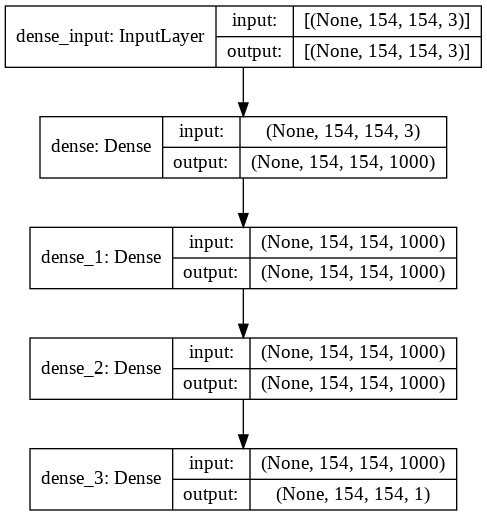

In [ ]:
keras.utils.plot_model(modelo, "imagen.png", show_shapes=True)

## 0403 Compilamos

In [ ]:
modelo.compile(optimizer = 'sgd', 
               loss = 'binary_crossentropy', 
               metrics = ['accuracy'])

modelo

## 0404 Entrenamos
[Colab notebook](https://colab.research.google.com/github/keras-team/keras-io/blob/master/guides/ipynb/training_with_built_in_methods.ipynb#scrollTo=IFz5UrHJC4SF) muy completo de la documentacion de Keras sobre el entrenamiento de redes neuronales.

In [ ]:
modelo.fit(X_train, y_train, epochs=25, batch_size=50)
modelo

Epoch 1/25


ValueError: ignored

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = modelo.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

## 0405 Predecimos


In [ ]:
# Usamos la red neuronal para predecir sobre el dataset de entrenamiento
y_pred_train = np.argmax(modelo.predict(X_train), axis=-1)

# Usamos la red neuronal para predecir sobre el dataset de test
y_pred_test = np.argmax(modelo.predict(X_test), axis=-1)

In [ ]:
# Calidad predicción train
ac_train = round(accuracy_score(y_train, y_pred_train), 4)
print('Precisión en set de entrenamiento :', ac_train)

# Calidad predicción test
ac_test = round(accuracy_score(y_test, y_pred_test), 4)
print('Precisión en set de test :', ac_test)

# Degradación de la predicción
print('Degradación: ' + str(round((ac_test-ac_train)/ac_train*100,2)) + '%')

# 05 EJERCICIO
Entrena una red neuronal que prediga si se da o no una complicación en una operación quirúrgica.

## 0501 Carga el dataset de complicaciones quirúrgicas
Aquí teneis el url del archivo raw del dataset: 

https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/complicacion_quirurgica.csv

Importa los datos en un dataframe llamado **dataframe df**.

In [ ]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/complicacion_quirurgica.csv'

# Importa csv
df = pd.read_csv(url, sep=',')

# Visualización primeras filas
df.head()

In [ ]:
df.info()

## 0502 Estandarización
Normaliza las variables numéricas para que estén en la misma escala.


In [ ]:
# columnas no binarias 
display(df.loc[:,df.isin([0,1]).all()==False].columns)

# non-binary cols
non_binary_cols = ['bmi', 'Age', 'asa_status', 'baseline_charlson', 'ahrq_ccs',
       'ccsComplicationRate', 'ccsMort30Rate', 'complication_rsi', 'dow',
       'hour', 'month', 'moonphase', 'mortality_rsi', 'race']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Inicializamos objeto de normalización
scaler = StandardScaler()

# "Entrenamos" el objeto 
scaler.fit(df[non_binary_cols])

# Transformamos las columnas no binarias
df[non_binary_cols] = scaler.transform(df[non_binary_cols])

df.head()

## 0503 Train - test
Separa el dataset en train y test.

In [ ]:
# Primero generamos la matriz X con las variables predictoras 
# y el vector y con la variable a predecir
X = df.drop('complication',axis=1)
y = df['complication']

# Comprueba sus tamaños
X.shape, y.shape

In [ ]:
# Haz la partición train-test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.33,
                                                    random_state=42)

# Comprueba sus tamaños
X_train.shape, X_test.shape, y_train.shape, y_test.shape

## 0504 Entrena una red neuronal
Prueba de hecho varias, con distintas arquitecturas.

In [ ]:
# Inicializamos la red neuronal
modelo_1 = Sequential([
    Dense(1000, activation='relu', input_shape=(X.shape[1],)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation="sigmoid")
    ], name = 'Red_1')

modelo_1.compile(optimizer = 'sgd', 
               loss = 'binary_crossentropy', 
               metrics = ['accuracy'])

modelo_1

In [ ]:
# Inicializamos la red neuronal
modelo_2 = Sequential([
    Dense(100, activation='relu', input_shape=(X.shape[1],)),
    Dense(100, activation='relu'),
    Dense(1, activation="sigmoid")
    ], name = 'Red_2')

modelo_2.compile(optimizer = 'sgd', 
               loss = 'binary_crossentropy', 
               metrics = ['accuracy'])
modelo_2

In [ ]:
modelo_1.fit(X_train, y_train, epochs=5, batch_size=50)

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = modelo_1.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

In [ ]:
modelo_2.fit(X_train, y_train, epochs=5, batch_size=50)

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = modelo_2.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

In [ ]:
# Usamos la red neuronal para predecir sobre el dataset de entrenamiento
y_pred_train = np.argmax(modelo_1.predict(X_train), axis=-1)

# Usamos la red neuronal para predecir sobre el dataset de test
y_pred_test = np.argmax(modelo_1.predict(X_test), axis=-1)

# Calidad predicción train
ac_train = round(accuracy_score(y_train, y_pred_train), 4)
print('Precisión en set de entrenamiento :', ac_train)

# Calidad predicción test
ac_test = round(accuracy_score(y_test, y_pred_test), 4)
print('Precisión en set de test :', ac_test)

# Degradación de la predicción
print('Degradación: ' + str(round((ac_test-ac_train)/ac_train*100,2)) + '%')

In [ ]:
# Usamos la red neuronal para predecir sobre el dataset de entrenamiento
y_pred_train = np.argmax(modelo_2.predict(X_train), axis=-1)

# Usamos la red neuronal para predecir sobre el dataset de test
y_pred_test = np.argmax(modelo_2.predict(X_test), axis=-1)

# Calidad predicción train
ac_train = round(accuracy_score(y_train, y_pred_train), 4)
print('Precisión en set de entrenamiento :', ac_train)

# Calidad predicción test
ac_test = round(accuracy_score(y_test, y_pred_test), 4)
print('Precisión en set de test :', ac_test)

# Degradación de la predicción
print('Degradación: ' + str(round((ac_test-ac_train)/ac_train*100,2)) + '%')